In [1]:
import imageio, random, numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (20,20)
image = imageio.imread('image.jpg').astype(np.float32)
klist = [3, 6, 16]

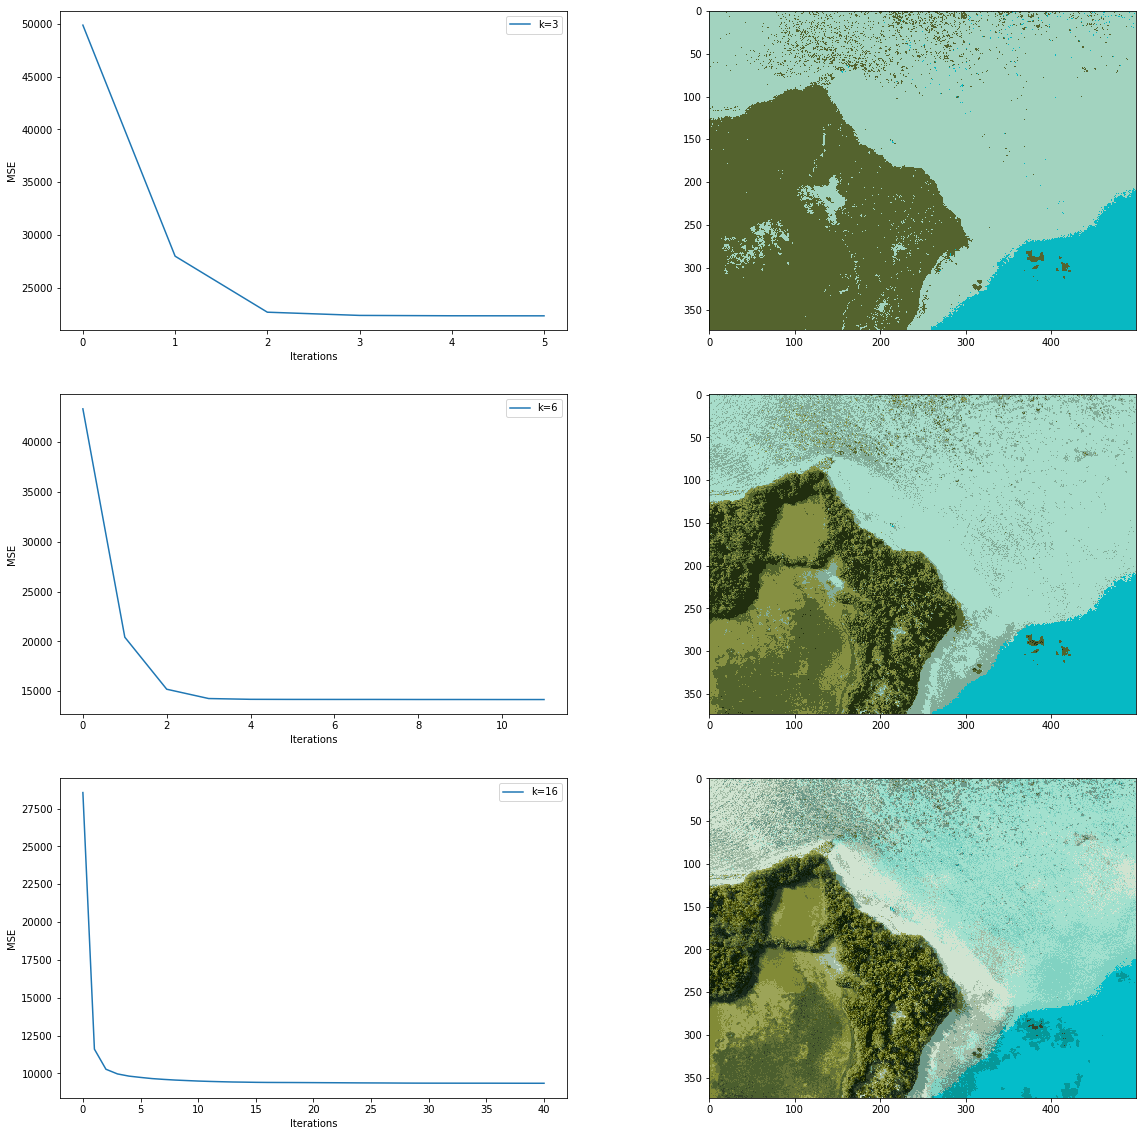

In [4]:
mses = []
for index, k in enumerate(klist):
    means = [np.random.randint(0, 255, 3) for _ in range(k)]
    min_indices, mse, step_mse = [], -1, []
    while True:
        distances = []
        for i in range(k):
            distances.append(np.linalg.norm(np.subtract(image, means[i]), axis=2))
        min_indices = np.argmin(distances, axis=0)
        new_mse = np.linalg.norm(np.min(distances, axis=0))
        if abs(mse - new_mse) < 1e-5:
            break
        mse = new_mse
        step_mse.append(mse)
        for i in range(k):
            means[i] = np.add(np.average(image[min_indices==i], axis=0), [0, 0, 0]).astype(np.uint8)
    mses.append(mse/(image.shape[0]*image.shape[1]))
    plt.subplot(len(klist), 2, index*2+1)
    plt.ylabel('MSE')
    plt.xlabel('Iterations')
    plt.plot(step_mse, label="k="+str(k))
    plt.legend()
    plt.subplot(len(klist), 2, index*2+2)
    im = np.zeros(image.shape, dtype=np.uint8)
    for i in range(k):
        im[min_indices==i] = means[i]
    plt.imshow(im)
plt.show()